In [1]:
# this file provides a general example on how to analyse the twitter data using role discovery
# other files in this project have different use cases, refer to those for in-depth analysis and explainations

In [2]:
# data processing and network processing 
import pandas as pd
import networkx as nx

# plotting
import matplotlib
import matplotlib.pyplot as plt

# role extraction
from graphrole import RecursiveFeatureExtractor, RoleExtractor

# extras
import numpy as np
import seaborn as sns
import warnings
from pprint import pprint

## Data Processing

In [3]:
# load the data set
data = pd.read_csv('data-triell.csv')

In [4]:
# check data
data.shape

(16660, 3)

In [5]:
# check first few columns of data frame
data.head()

,username_1,username_2,timestamp_s
0,MetinHakverdi,Nico,1630267154
1,JensZSPD,Nico,1630264243
2,hschmidt,Nico,1630263176
3,MartinRosemann,Nico,1630264131
4,CarstenOvens,Nico,1630263327


## Creating Network/Graph

In [6]:
def create_directed_graph(df):
    g = nx.from_pandas_edgelist(df, source='username_1',
                                target='username_2',
                                create_using=nx.DiGraph())
    return g

In [7]:
# create graph based on twitter mentions from dataframe
g = create_directed_graph(data)

In [8]:
g    # check graph

In [9]:
# get info on graph
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 4114
Number of edges: 9949
Average in degree:   2.4183
Average out degree:   2.4183


In [10]:
# create subgraph (egograph) of specific node
x = ''
def create_subgraph():
    
    # user gives twitter handle as input, egograph/subgraph of the input is created
    x = input()
    f = nx.ego_graph(g, x, undirected=True)
    
    # print information of graph
    print(nx.info(f))
    
    # plot created subgraphh
    nx.draw_networkx(f, with_labels=False, node_size=200, width=2.0,
                     node_color = ['red' if node == x else 'teal' for node in f],
                     pos=nx.circular_layout(f))
    
    # print list of all nodes
    print(list(f.nodes))
    
    return f

## Role Discovery on Twitter Network 

In [12]:
# extract features using graphrole library
feature_extractor = RecursiveFeatureExtractor(g)
features = feature_extractor.extract_features()

In [13]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

# print list of all nodes with their role
print('\nnode_roles:')
pprint(node_roles)

# print each nodes percent membership to each role
print('\nnodepercentage:')
print(role_extractor.role_percentage.round(2))


node_roles:
{'00schneemann': 'role_0',
 '0815_goes_4711': 'role_0',
 '0Murat0': 'role_6',
 '0__Punkt': 'role_0',
 '0x127001': 'role_6',
 '100erneuerbar': 'role_0',
 '10DMark': 'role_0',
 '11achim71': 'role_3',
 '123Lenchen': 'role_0',
 '1893ituka': 'role_0',
 '1900HO': 'role_7',
 '1951Mann': 'role_0',
 '1964Andreasda': 'role_0',
 '1Klaudius62': 'role_6',
 '1arealtalk': 'role_0',
 '1teufelskreis': 'role_0',
 '2008_jens': 'role_0',
 '31O6926': 'role_5',
 '3697elfriedel': 'role_6',
 '4g0nm': 'role_5',
 '558d86617a41449': 'role_4',
 '6cks_': 'role_0',
 '73erStrikesBack': 'role_6',
 '7654321o': 'role_6',
 '90sChris': 'role_7',
 '98mercedes98': 'role_7',
 '99Michel99': 'role_3',
 'A1207Sa': 'role_6',
 'ABCWorldNews': 'role_0',
 'ABaerbock': 'role_0',
 'ABalsliemke': 'role_3',
 'ADressel': 'role_2',
 'AGBuelow': 'role_0',
 'AGH_Berlin': 'role_0',
 'AGStadtkerne': 'role_0',
 'AK55828631': 'role_5',
 'AK_Meier': 'role_0',
 'AK__Social': 'role_6',
 'AKaiser94789344': 'role_0',
 'ALevermann': 'r

 'KippelsNicole': 'role_3',
 'KirstenGerhards': 'role_6',
 'KirstenKappert': 'role_4',
 'KirstenTackmann': 'role_7',
 'Kitsuagi': 'role_0',
 'Kla138': 'role_3',
 'KlassikStiftung': 'role_0',
 'KlausAdelt': 'role_4',
 'KlausBeckmann6': 'role_6',
 'KlausEuteneuer': 'role_0',
 'KlausMl67471449': 'role_0',
 'KlausObergfell': 'role_0',
 'KlausWeckbach': 'role_0',
 'Klawunke': 'role_0',
 'KlimalisteRLP': 'role_0',
 'KntktGrAHaftDD': 'role_0',
 'KoehlerClaudia7': 'role_0',
 'KoenigDickBauch': 'role_6',
 'Koenigin_Chaos': 'role_0',
 'KoeppelRoger': 'role_0',
 'KoheletDP': 'role_6',
 'KohlmeierSPD': 'role_0',
 'KokospalmeBlog': 'role_7',
 'Kolibri32522549': 'role_7',
 'Komische_Oper': 'role_0',
 'Konni': 'role_0',
 'Konrad': 'role_2',
 'KonstantinKuhle': 'role_1',
 'KonstantinNotz': 'role_2',
 'KontraAbtreiben': 'role_0',
 'Koogle91417074': 'role_0',
 'KostenloseE': 'role_6',
 'KrahMax': 'role_0',
 'Krakengarten': 'role_0',
 'Krawallstein': 'role_1',
 'Kreddy_Fruegger': 'role_3',
 'Kreis_Lippe'

 'andreasdueren': 'role_1',
 'andrebaumann': 'role_0',
 'andreeboehling': 'role_0',
 'angelpice1970': 'role_3',
 'aniho91': 'role_0',
 'anjes_tjarks': 'role_0',
 'anna19854977619': 'role_0',
 'anna_cavazzini': 'role_0',
 'annachristmann': 'role_0',
 'annakatrein': 'role_0',
 'annalist': 'role_0',
 'annaquent': 'role_0',
 'annarmpeters': 'role_0',
 'anncathrin87': 'role_0',
 'annelies_bruhne': 'role_0',
 'annette_bulut': 'role_0',
 'annewill': 'role_0',
 'anondiver': 'role_4',
 'anonykatz2210': 'role_4',
 'anonyme_melone': 'role_3',
 'anoynews': 'role_0',
 'antjeschippmann': 'role_0',
 'antjeschrupp': 'role_0',
 'antrehherrmann': 'role_0',
 'anunnehh': 'role_4',
 'apelt_david': 'role_6',
 'arMa_sN': 'role_7',
 'argonerd': 'role_0',
 'arietzschel': 'role_0',
 'arif_tasdelen': 'role_2',
 'arndhenze': 'role_0',
 'artemi_ecrit': 'role_0',
 'artep21': 'role_0',
 'aschalowski': 'role_7',
 'astefanowitsch': 'role_0',
 'astsaft': 'role_6',
 'atstp': 'role_7',
 'aus_coe': 'role_6',
 'ausretrogam

 'textmagd': 'role_0',
 'thPichler': 'role_0',
 'th_sattelberger': 'role_7',
 'the4thpip': 'role_5',
 'theNeo42': 'role_4',
 'theWellRedMage': 'role_0',
 'the_real_urbsi': 'role_0',
 'thekla_walker': 'role_0',
 'themroc': 'role_0',
 'theresahein_': 'role_3',
 'thesismum': 'role_0',
 'thewofb': 'role_5',
 'thinkBTO': 'role_0',
 'thomas2theleft': 'role_0',
 'thomas_grieme': 'role_0',
 'thomas_wiegold': 'role_0',
 'thomasbogner9': 'role_7',
 'thomasdudzak': 'role_0',
 'thomaskowtsch': 'role_0',
 'thommy_x': 'role_0',
 'thon_atze': 'role_6',
 'thoolb1': 'role_5',
 'thorstenbenner': 'role_4',
 'throwaway26389': 'role_5',
 'thueringende': 'role_0',
 'tibor': 'role_0',
 'till_steffen': 'role_2',
 'tillmoabit': 'role_3',
 'timo_kon': 'role_0',
 'timski04': 'role_0',
 'tinastipps': 'role_0',
 'tintenpro': 'role_7',
 'tj_tweets': 'role_4',
 'tjarkmelchert': 'role_4',
 'tmie00988194': 'role_6',
 'tmodc': 'role_3',
 'tobiashans': 'role_0',
 'tobiaslindner': 'role_3',
 'tobihentze': 'role_0',
 'tob

In [14]:
# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in g.nodes]

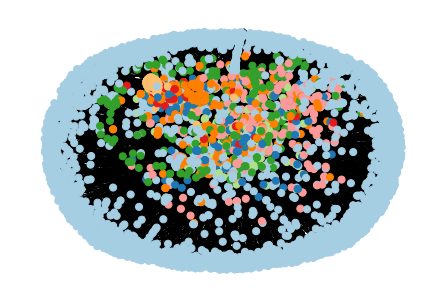

In [16]:
# plot graph
plt.figure()

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        g,
        pos=nx.spring_layout(g),
        with_labels=False,
        node_color=node_colors,
        node_size=50, width=1.0,
    )

plt.show()

# shows huge condensed graph, does not reveal much
# better to use subgraph function provided

In [17]:
# another issue: algorithm does not specify which role gets which colour

In [6]:
nx --version

NameError: name 'nx' is not defined